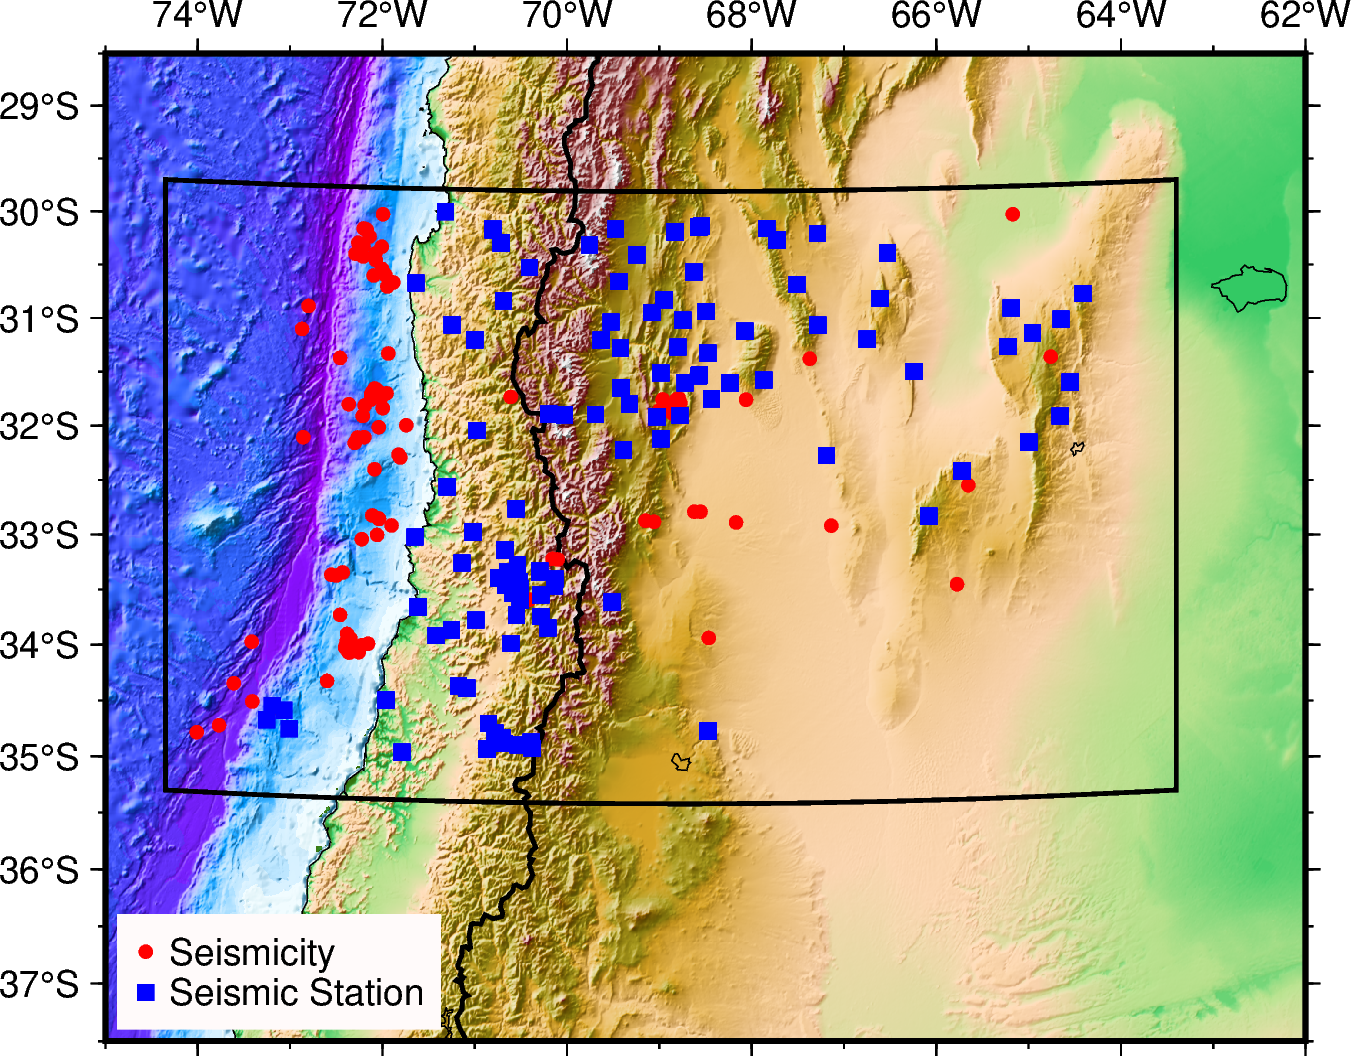

In [1]:
import pygmt
import pandas as pd
import numpy as np

#datadir="/home/tianjue/SPMS/NCA/Data"

datadir = "/home/ketan/IndiaConnectNTU/Week5-6/DownloadData/Data"

#datadir = "/home/ketan/Downloads/Amit"

minlon, maxlon = -75, -62
minlat, maxlat = -37.5, -28.5

#define etopo data file
topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")

#plot high res topography
fig.grdimage(grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    cmap="globe",projection='M4i',shading=True,frame=['xa2f1+l"longitude"', 'ya1f0.5+l"latitude"', 'WsNe'])

fig.coast(frame=False,shorelines=True,borders='1/1p,black')

#plot fault lines
#fig.plot(data = f"{datadir}/AMFault")

#plot events
df=pd.read_csv(f"{datadir}/events.csv", sep=',', usecols=[0,1,2,3,5])
df.columns=["time","lat","lon","dep","mag"]
fig.plot(x=df["lon"], y=df["lat"], color="red", style="c0.12c", label="Seismicity")
# plot stations
df=pd.read_csv(f"{datadir}/stations.txt", sep='|', usecols=[0,1,4,5])
df.columns=["net","station","lat","lon"]
fig.plot(x=df["lon"], y=df["lat"], color="blue", style="s0.2c", label='"Seismic Station"')

#plot study region
fig.plot(
    x=[-74.35, -63.4, -63.4, -74.35, -74.35],
    y=[-35.3, -35.3, -29.7, -29.7, -35.3],
    pen="1p,black",
)

#show the location of Ridgecrest EQ and Coso Volcano
#fig.plot(x=[-117.5993],y=[35.7695],style="a0.5c",color="yellow",pen="0.5p,black")
#fig.plot(x=[-117.82],y=[36.03],style="kvolcano",sizes=[0.7],color="brown",pen="0.5p,black")

fig.legend(position="Jbl+jbl+o0.1c", box="+gsnow")
fig.show()